## Markowitz Portfolio Optimization

### Import key libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


### Get data

In [2]:
assets = ['PG', '^GSPC','PLUG', 'TSLA', 'HMWD.L']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source ='yahoo', start='2017-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC,PLUG,TSLA,HMWD.L
Date,,,,,
2021-02-23,127.519997,3881.370117,46.580002,698.840027,19.682501
2021-02-24,127.660004,3925.429932,50.160000,742.020020,19.847500
2021-02-25,126.580002,3829.340088,43.340000,682.219971,19.776251
2021-02-26,123.529999,3811.149902,NaN,675.500000,19.636250
2021-03-01,125.080002,3910.429932,51.330002,709.679993,27.834999


<AxesSubplot:xlabel='Date'>

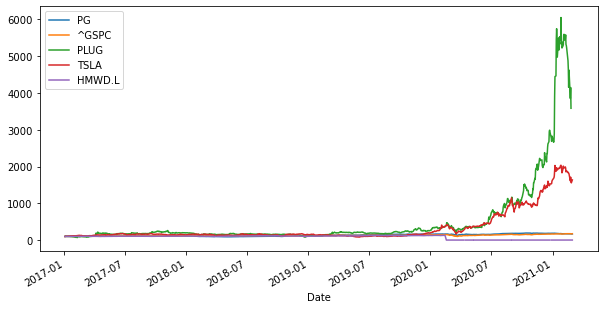

In [4]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

PG        0.124246
^GSPC     0.131398
PLUG      0.857731
TSLA      0.668517
HMWD.L   -0.973057
dtype: float64

In [7]:
log_returns.cov() * 250

,PG,^GSPC,PLUG,TSLA,HMWD.L
PG,0.044285,0.026138,0.026742,0.023276,0.022152
^GSPC,0.026138,0.041593,0.061822,0.054910,0.024897
PLUG,0.026742,0.061822,0.656719,0.137667,-0.068615
TSLA,0.023276,0.054910,0.137667,0.376692,-0.042854
HMWD.L,0.022152,0.024897,-0.068615,-0.042854,5.305063


In [8]:
num_assets = len(assets)
num_assets

5

In [9]:
arr = np.random.random(2)
arr

array([0.48788572, 0.75092317])

In [10]:
arr[0] + arr[1]

1.2388088908927983

In [11]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.1961134 , 0.13387964, 0.26340366, 0.22884091, 0.17776239])

In [12]:
weights[0] + weights[1]

0.32999304211258773

### Expected Porfolio Return

In [13]:
np.sum(weights * log_returns.mean()) * 250

0.24789834550579348

### Expected Portfolio Variance

In [14]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.2587398839912041

In [15]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.5086648051430374

In [20]:
pfolio_returns = []
pfolio_volalities = []

for x in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volalities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
 
pfolio_returns = np.array(pfolio_returns)
pfolio_volalities = np.array(pfolio_volalities )
pfolio_returns, pfolio_volalities

(array([ 0.2654774 ,  0.17811795,  0.15871328, ...,  0.2646767 ,
         0.36301229, -0.00633404]),
 array([0.36597998, 0.4668859 , 0.42239466, ..., 0.51008326, 0.3962044 ,
        0.62376073]))

In [21]:
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volalities})


In [22]:
portfolios.head()

,Return,Volatility
0,0.265477,0.365980
1,0.178118,0.466886
2,0.158713,0.422395
3,-0.014689,0.785691
4,0.341247,0.347751


Text(0, 0.5, 'Expected Return')

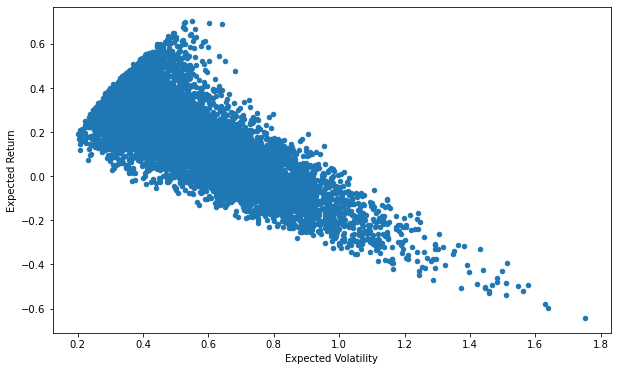

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')